In [58]:
import re, sys
import nilearn
from nilearn import plotting, input_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load relevant data

1. extracted audiofeature (RMSE)
2. extracted fMRI data

In [72]:
resampled_audio_feature = np.load('../data_pieman/resampled_audio_feature.npy')
print(resampled_audio_feature.shape)

fmri_data = np.load('../data_pieman/fmri_data_pieman.npy')
print(fmri_data.shape)

print(fmri_data.shape)

(300,)
(68, 300, 293)
(68, 300, 293)


In [73]:
resmat_all = np.nanmean(fmri_data, axis = 0)
resmat_all.shape

(300, 293)

In [74]:
#plt.figure(figsize = (20,2))
#plt.plot(resampled_audio_feature)


In [75]:
res = []
for i in range(268):
    res.append(np.corrcoef(resmat_all[2:,i], resampled_audio_feature[:-2])[0,1])
    
#plt.plot(res);

print(np.argmax(res))

print(np.max(res))

162
0.2594524188254977


In [76]:
shen_file       = '../data_pieman/shen_2mm_268_parcellation.nii'
'''
nilearn.plotting.plot_roi(shen_file, 
                  annotate = False, 
                  cut_coords = (5,0,0),
                  cmap = 'prism',
                  draw_cross = False, 
                  #title= 'Shen-268-node parcellation',
                 );'''
shen_masker = nilearn.input_data.NiftiLabelsMasker(labels_img=shen_file);

sample_file = '../data_pieman/func.nii'
shen_masker.fit_transform(sample_file);

In [98]:
res = np.asarray(res)
res[res < 0.1] = 0

r2 = np.reshape(res, (1,268))
r2.shape

(1, 268)

In [99]:
res_img = shen_masker.inverse_transform(r2);

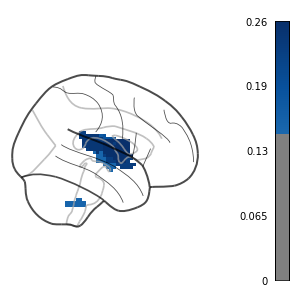

In [100]:
plotting.plot_glass_brain(nilearn.image.index_img(res_img,0), 
                          colorbar=True, 
                          cmap="Blues", 
                          threshold=0.15,
                          plot_abs=False, 
                          display_mode='x',
                          figure=plt.figure(figsize=(4, 4)));

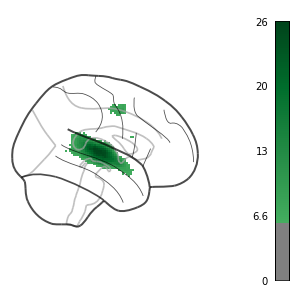

In [79]:
plotting.plot_glass_brain('../data_pieman/auditory_association-test_z_FDR_0.01.nii.gz', 
                          colorbar=True, 
                          cmap = 'Greens',
                          threshold=6.15,
                          plot_abs=True, 
                          display_mode='x',
                          figure=plt.figure(figsize=(4, 4)));

In [80]:
#res_img = shen_masker.inverse_transform(r2);
#view = nilearn.plotting.view_img(  nilearn.image.index_img(res_img,0), 
#                                     threshold = 0.0, 
#                                     vmax = 0.2, 
#                              );
#view

In [81]:
#view = nilearn.plotting.view_img(  '../data_pieman/auditory_association-test_z_FDR_0.01.nii.gz', 
#                                     threshold = 0.0, 
#                                     #vmax = 0.2, 
#                              );
#view

In [86]:
resmat_all.shape

(300, 293)

In [90]:
from scipy.stats import zscore

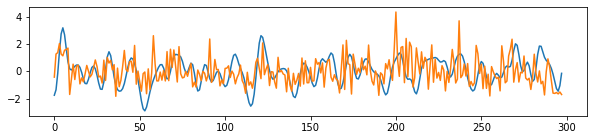

In [93]:
plt.figure(figsize = (10,2))
plt.plot(zscore(resmat_all[2:,162]));
plt.plot(zscore(resampled_audio_feature[:-2]));

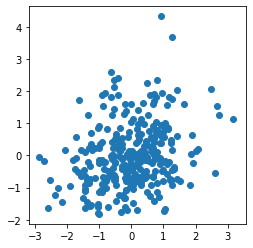

In [96]:
plt.scatter(zscore(resmat_all[2:,162]),
            zscore(resampled_audio_feature[:-2]));
plt.axis('square');